# Projekt 2  i Databearbetning - **"The Real Deal"**

Scraping data of Steam Sales!

**Link to steam specials page 1:** https://store.steampowered.com/search/?specials=1

we use: **pandas, beautifulsoup, requests**

End goal: a table with this kind of format: 

**Spelnamn|Rating|#Reviews|Rabatt%|Pris|OrdinariePris|Utgivningsår|Win|Lin|OSX|Tid**
1. gameTitleData 2. gameRatingData 3. reviewAmountData 4. saleProcentData 5. discountPriceData 6. originalPriceData  7. releaseData 8. macSupportData 9. linSupportData 10. winSupportData

*tid = time of fetch

In [998]:
# downloads and imports
from IPython.core.display import HTML # to display HTML data better 
import pandas as pd
import requests # get the data of a site
from bs4 import BeautifulSoup # parse and handle incoming data

### First we **Import the Data**
with requests

we import the data from the steam special offers page. page one link: https://store.steampowered.com/search/?specials=1&page=1

Then by chaning the page=1 variable to 2 it goes to page 2 etc.

In [999]:
# save response as variable
res = requests.get("https://store.steampowered.com/search/?specials=1&page=5")

In [1000]:
# reposone OK
res

<Response [200]>

### **Data Parsing and Discovery** 
with BeautifulSoup, Pandas, and HTML

In [1001]:
# the whole page as a soup 
soup = BeautifulSoup(res.text, 'html.parser')

In [1002]:
type(soup)

bs4.BeautifulSoup

**Here we can look at the search results of the 1st page by uncommenting the third line:**

In [1003]:
# view search results
searchResults = soup.findAll("div", class_="search_results")
#HTML(str(searchResults)) # <-- uncomment this line 

In [1004]:
type(searchResults)

bs4.element.ResultSet

In [1005]:
# all final discounted prices
finalPriceData = []
finalPrices = soup.findAll(attrs={"class": "discount_final_price"})
for row in finalPrices:
    price = row.text
    finalPriceData.append(price)
finalPriceData[10:21]

['15,07€',
 '19,60€',
 '35,54€',
 '24,99€',
 '21,21€',
 '12,00€',
 '11,51€',
 '3,99€',
 '9,76€',
 '30,91€',
 '31,11€']

In [1006]:
# Euro Truck Simulator 2
etsTitle = soup.find("span", class_="title")
etsTitle

<span class="title">Frostpunk 2</span>

In [1007]:
etsTitle.text

'Frostpunk 2'

In [1008]:
# Euro Truck Simulator 2 is playable on:
etsplayableOn = etsTitle.find_next_sibling()
etsplayableOn

<div>
<span class="platform_img win"></span><span class="platform_img mac"></span> </div>

In [1009]:
if (etsplayableOn.find("span", class_="platform_img mac")):
    print("MacOS supported")
if (etsplayableOn.find("span", class_="platform_img linux")):
    print("Linux supported")
if (etsplayableOn.find("span", class_="platform_img win")):
    print("Winwdows supported")

MacOS supported
Winwdows supported


### So basically just a simple HTML page with pretty straight forward structure, search results (the games) as a container with rows.
### We want a table in the form of:
**Spelnamn|Rating|#Reviews|Rabatt%|Pris|OrdinariePris|Utgivningsår|Win|Lin|OSX|Tid**

In [1010]:
# reminder (remove type() to see HTML content)
type(searchResults)

bs4.element.ResultSet

In [1011]:
# variables for games and one game for testing
secondGame = soup.findAll("a", class_="search_result_row")[1]
allGames = soup.findAll("a", class_="search_result_row")

### GAME TITLES:

In [1012]:
# get the name of the second game
secondGame.find("span", class_="title").text

'Green Hell'

In [1013]:
# Title of the games
# traditional loop where we get the title.text of each "search result"/game
gameTitleData = []
for game in allGames:
    title = game.find("span", class_="title").text
    gameTitleData.append(title)

In [1014]:
gameTitleData

['Frostpunk 2',
 'Green Hell',
 'Our Life Bundle',
 'PGA TOUR 2K23',
 'Hooded Horse Conquest',
 'Voidtrain - Deluxe Edition',
 'Texas-sized Bundle',
 'GRIS x Neva',
 'TopSpin 2K25',
 "Sid Meier's Civilization VI : Platinum Edition",
 'Contraband Police',
 'SULFUR',
 'Thief and House Builder 2',
 'Banishers: Ghosts of New Eden',
 'Darkest Dungeon: The Iron Crown',
 'Homeworld Remastered Collection Deluxe Edition',
 'Get To Work',
 'Dying Light',
 'Ale & Tale Tavern',
 'mc2games Escape Room Bundle',
 'Junkyard Police',
 'Among Us',
 'Aerilon X Mutiny Collection Bundle',
 'Farming Simulator 25 - Year 1 Bundle',
 'Shadow of the Tomb Raider: Definitive Edition']

### RATINGS:

In [1015]:
# for one game
# find span with "classname=search_review_summary" and get the value of "attribute=data-tooltip-html"
reviewSummary = secondGame.find("span", class_="search_review_summary").get('data-tooltip-html')
reviewSummary

'Very Positive<br>86% of the 56,239 user reviews for this game are positive.'

In [1016]:
# split at the break line and only take the first text which is the rating, Ex: 'Very Positive'
gameRating = reviewSummary.split("<br>")[0]

In [1017]:
gameRating

'Very Positive'

In [1018]:
# now lets get the titles for all the games like previously:
gameRatingData = []
for game in allGames:
    if (game.find("span", class_="search_review_summary")): # if there is a rating
        rating = game.find("span", class_="search_review_summary").get('data-tooltip-html').split("<br>")[0] # same code as for one game but oneliner
        gameRatingData.append(rating)
    else: # else we append "no rating available"
        gameRatingData.append("no rating available")
gameRatingData

['Mostly Positive',
 'Very Positive',
 'Overwhelmingly Positive',
 'Mostly Positive',
 'Very Positive',
 'Mostly Positive',
 'Overwhelmingly Positive',
 'Overwhelmingly Positive',
 'Mixed',
 'Very Positive',
 'Overwhelmingly Positive',
 'Very Positive',
 'Very Positive',
 'Very Positive',
 'Very Positive',
 'Very Positive',
 'Very Positive',
 'Overwhelmingly Positive',
 'Very Positive',
 'Very Positive',
 'Very Positive',
 'Very Positive',
 'Mostly Positive',
 'Very Positive',
 'Very Positive']

### Create new units in integers instead of steams own texts
from 1 - 8, where 8 is no reviews and 1 is overwhelmingly positive

In [1019]:
# function for converting the text reviews to numbers 1-8
def ratingConverter(gameRatingData):
    for i, rating in enumerate(gameRatingData):
        if (rating == "Overwhelmingly Positive"):
            gameRatingData[i] = 1
        elif (rating == "Very Positive"):
            gameRatingData[i] = 2
        elif (rating == "Positive"):
            gameRatingData[i] = 3
        elif (rating == "Mostly Positive"):
            gameRatingData[i] = 4
        elif (rating == "Mixed"):
            gameRatingData[i] = 5
        elif (rating == "Mostly Negative"):
            gameRatingData[i] = 6
        elif (rating == "Overwhelmingly Negative"):
            gameRatingData[i] = 7
        elif (rating == "No User Reviews"):
            gameRatingData[i] = 8

In [1020]:
# convert the first page
ratingConverter(gameRatingData)
print(gameRatingData)
print("Length:", len(gameRatingData))

[4, 2, 1, 4, 2, 4, 1, 1, 5, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 2]
Length: 25


### Number of Reviews (amount)

In [1021]:
# same thing here, different split 
# for that we need to import regular expressions module
import re

re?

Type:        module
String form: <module 're' from '/opt/conda/lib/python3.11/re/__init__.py'>
File:        /opt/conda/lib/python3.11/re/__init__.py
Docstring:  
Support for regular expressions (RE).

This module provides regular expression matching operations similar to
those found in Perl.  It supports both 8-bit and Unicode strings; both
the pattern and the strings being processed can contain null bytes and
characters outside the US ASCII range.

Regular expressions can contain both special and ordinary characters.
Most ordinary characters, like "A", "a", or "0", are the simplest
regular expressions; they simply match themselves.  You can
concatenate ordinary characters, so last matches the string 'last'.

The special characters are:
    "."      Matches any character except a newline.
    "^"      Matches the start of the string.
    "$"      Matches the end of the string or just before the newline at
             the end of the string.
    "*"      Matches 0 or more (greedy) repet

In [1022]:
reviewAmountData = []

for game in allGames:
    if (game.find("span", class_="search_review_summary")): # if reviews exists
        reviewSummary = game.find("span", class_="search_review_summary").get('data-tooltip-html')
        # chatGPT help with regex
        nReviews = re.findall(r'\d{1,3}(?:,\d{3})+', reviewSummary)
        reviewAmountData.append(nReviews)
    else: # we append "no review"
        reviewAmountData.append("no reviews available")
reviewAmountData

[['13,789'],
 ['56,239'],
 [],
 ['4,333'],
 ['16,876'],
 ['4,722'],
 ['138,702'],
 ['71,476'],
 ['1,116'],
 ['251,732'],
 ['17,087'],
 ['2,347'],
 ['6,178'],
 ['3,486'],
 ['140,738'],
 ['11,274'],
 [],
 ['323,305'],
 ['3,254'],
 ['1,428'],
 ['18,677'],
 ['610,186'],
 [],
 ['13,879'],
 ['59,841']]

### SALE PROCENTS,  DISCOUNT PRICE, ORIGINAL PRICE

In [1023]:
# for loop where we get all of them since they are all in the same "discount_block"
saleProcentData = []
discountPriceData = []
originalPriceData = []
for game in allGames:
    # discountBlock -> the block where all the discount information is
    discountBlock = game.find("div", class_="discount_block")

    #PROCENT
    # if there is a sale ->
    if discountBlock("div", class_="discount_pct"):
        saleProc = discountBlock.find("div", class_="discount_pct").text
    # else assign default value as 0%
    else:
        saleProc = "0%"
    # append to list
    saleProcentData.append(saleProc)

    #DISCOUNT PRICE
    if discountBlock("div", class_="discount_final_price"):
        finalPrice = discountBlock.find("div", class_="discount_final_price").text
        # append to list
        discountPriceData.append(finalPrice)

    #ORIGINAL PRICE
    if discountBlock("div", class_="discount_original_price"):
        originalPrice = discountBlock.find("div", class_="discount_original_price").text
        # append to list
        originalPriceData.append(originalPrice)
    # non sale games
    else:
        originalPrice = discountBlock.find("div", class_="discount_final_price").text
        # append to list
        originalPriceData.append(originalPrice)
        
print(len(discountPriceData)) # check that all of them are equal length, 50 per page.
print(len(saleProcentData))
print(len(originalPriceData))
#print("Sale prices: ", discountPriceData)
#print("Sale procentages: ", saleProcentData)
#print("Original prices: ", originalPriceData)

25
25
25


### Utgivningsår
once again, with a traditional loop we get the data to a list

In [1024]:
releaseData = []
for game in allGames:
    # find the release date div    
    releaseDate = game.find("div", class_="col search_released responsive_secondrow").text.strip()
    
    if (releaseDate): # if not empty, save date to list
        releaseData.append(releaseDate)
    else: # else we append "no release date" to the list instead
        releaseData.append("no release date")
releaseData 

['20 Sep, 2024',
 '5 Sep, 2019',
 'no release date',
 '13 Oct, 2022',
 'no release date',
 'no release date',
 'no release date',
 'no release date',
 '25 Apr, 2024',
 'no release date',
 '8 Mar, 2023',
 '28 Oct, 2024',
 'no release date',
 '12 Feb, 2024',
 'no release date',
 'no release date',
 '2 Dec, 2024',
 '21 Apr, 2016',
 '5 Sep, 2024',
 'no release date',
 'no release date',
 '16 Nov, 2018',
 'no release date',
 'no release date',
 '14 Sep, 2018']

In [1025]:
len(releaseData)

25

### SUPPORTED PLATFORMS
get the data for what platform is supported for each game, there is an icon of the 3 platforms if supported, else nothing is displayed.

**Screenshot of earlier discovering for reminder:**

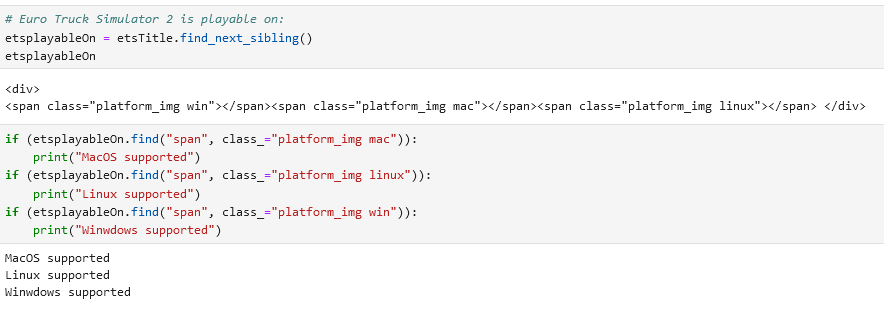

In [1026]:
# check if platform icon exsists, add 1 if yes, else 0 
macSupportData = []
linSupportData = []
winSupportData = []
for game in allGames:
    # check for mac support
    if (game.find("span", class_="platform_img mac")): macSupportData.append(1)
    else: macSupportData.append(0)
    # check for lin support
    if (game.find("span", class_="platform_img lin")): linSupportData.append(1)
    else: linSupportData.append(0)
    # check for win support
    if (game.find("span", class_="platform_img win")): winSupportData.append(1)
    else: winSupportData.append(0)
# check that length is 50 for each
print(len(macSupportData))
print(len(linSupportData))
print(len(winSupportData))

25
25
25


## CREATE DATAFRAME:

In [1027]:
from datetime import datetime # for fetch time column

In [1028]:
# add data from lists with traditional loop
rows = [["Spelnamn", "Rating", "#Reviews", "Rabatt%", "Pris", "OrdinariePris", "Utgivningsår", "Win", "Lin", "OSX", "Tid"]]
fetchTime = datetime.now().strftime("%d.%m.%Y") # date for fetch
for i, game in enumerate(allGames):
    row = [gameTitleData[i], gameRatingData[i], reviewAmountData[i], saleProcentData[i], discountPriceData[i], originalPriceData[i], releaseData[i], macSupportData[i], linSupportData[i], winSupportData[i], fetchTime]
    rows.append(row)
#rows <-- UNCOMMENT TO SEE HOW THE DATA LOOKS LIKE

In [1029]:
# create dataframe
df = pd.DataFrame(rows)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,Spelnamn,Rating,#Reviews,Rabatt%,Pris,OrdinariePris,Utgivningsår,Win,Lin,OSX,Tid
1,Frostpunk 2,4,"[13,789]",-20%,"35,99€","44,99€","20 Sep, 2024",1,0,1,07.12.2024
2,Green Hell,2,"[56,239]",-67%,"6,92€","20,99€","5 Sep, 2019",0,0,1,07.12.2024


In [1030]:
df.columns = df.iloc[0] # set first row as column titles 
df = df.drop(0).reset_index(drop=True) # remove the row and reset index

### Discovery on the DataFrame:

In [1031]:
df.head(5)

,Spelnamn,Rating,#Reviews,Rabatt%,Pris,OrdinariePris,Utgivningsår,Win,Lin,OSX,Tid
0,Frostpunk 2,4,"[13,789]",-20%,"35,99€","44,99€","20 Sep, 2024",1,0,1,07.12.2024
1,Green Hell,2,"[56,239]",-67%,"6,92€","20,99€","5 Sep, 2019",0,0,1,07.12.2024
2,Our Life Bundle,1,[],0%,"33,67€","33,67€",no release date,0,0,1,07.12.2024
3,PGA TOUR 2K23,4,"[4,333]",-85%,"8,99€","59,99€","13 Oct, 2022",0,0,1,07.12.2024
4,Hooded Horse Conquest,2,"[16,876]",0%,"44,97€","44,97€",no release date,0,0,1,07.12.2024


In [1032]:
# describe, shape, type
print("describe:\n", df.describe(), end="\n\n")
print("shape:\n", df.shape, end="\n\n")
print("type:\n", type(df))

describe:
 0          Spelnamn  Rating #Reviews Rabatt%    Pris OrdinariePris  \
count            25      25       25      25      25            25   
unique           25       4       23      15      25            24   
top     Frostpunk 2       2       []      0%  35,99€        59,99€   
freq              1      15        3       7       1             2   

0          Utgivningsår  Win  Lin  OSX         Tid  
count                25   25   25   25          25  
unique               13    2    1    1           1  
top     no release date    0    0    1  07.12.2024  
freq                 13   17   25   25          25  

shape:
 (25, 11)

type:
 <class 'pandas.core.frame.DataFrame'>


## Creating a CSV file out of our DataFrame:
**Columns for reminder -> Spelnamn|Rating|#Reviews|Rabatt%|Pris|OrdinariePris|Utgivningsår|Win|Lin|OSX|Tid**

**file names:**

1. gameTitleData 2. gameRatingData 3. reviewAmountData 4. saleProcentData 5. discountPriceData 6. originalPriceData  7. releaseData 8. macSupportData 9. linSupportData 10. winSupportData

In [1033]:
import csv # to create csv file 
import os # to check if file exsists already

In [1034]:
df.head()

,Spelnamn,Rating,#Reviews,Rabatt%,Pris,OrdinariePris,Utgivningsår,Win,Lin,OSX,Tid
0,Frostpunk 2,4,"[13,789]",-20%,"35,99€","44,99€","20 Sep, 2024",1,0,1,07.12.2024
1,Green Hell,2,"[56,239]",-67%,"6,92€","20,99€","5 Sep, 2019",0,0,1,07.12.2024
2,Our Life Bundle,1,[],0%,"33,67€","33,67€",no release date,0,0,1,07.12.2024
3,PGA TOUR 2K23,4,"[4,333]",-85%,"8,99€","59,99€","13 Oct, 2022",0,0,1,07.12.2024
4,Hooded Horse Conquest,2,"[16,876]",0%,"44,97€","44,97€",no release date,0,0,1,07.12.2024


In [1035]:
# create CSV file out of dataframe
if (not os.path.exists('steamSaleData.csv')): #create new csv
    df.to_csv('steamSaleData.csv', index=False)
    print("new csv file created")
else: # append to csv
    df.to_csv('steamSaleData.csv', mode='a', index=False, header=False) # we dont want to rewrite column titles
    print("appended to csv file")

appended to csv file


### Create DataFrame out of the full csv:

In [1036]:
# look at the full csv as a pandas dataframe
fullDf = pd.read_csv('steamSaleData.csv')
fullDf

,Spelnamn,Rating,#Reviews,Rabatt%,Pris,OrdinariePris,Utgivningsår,Win,Lin,OSX,Tid
0,Euro Truck Simulator 2,1,"['615,197']",-75%,"4,99€","19,99€","12 Oct, 2012",1,0,1,07.12.2024
1,Red Dead Redemption 2,2,"['592,159']",-67%,"19,79€","59,99€","5 Dec, 2019",0,0,1,07.12.2024
2,Balkans Bundle,2,"['5,164']",-34%,"25,41€","38,37€",no release date,1,0,1,07.12.2024
3,Forza Horizon 4,2,"['249,558']",-80%,"13,99€","69,99€","9 Mar, 2021",0,0,1,07.12.2024
4,Tom Clancy's Rainbow Six® Siege,2,"['1,137,481']",-60%,"7,99€","19,99€","1 Dec, 2015",0,0,1,07.12.2024
...,...,...,...,...,...,...,...,...,...,...,...
120,Junkyard Police,2,"['18,677']",-29%,"31,11€","43,64€",no release date,0,0,1,07.12.2024
121,Among Us,2,"['610,186']",-40%,"2,69€","4,49€","16 Nov, 2018",0,0,1,07.12.2024
122,Aerilon X Mutiny Collection Bundle,4,[],0%,"9,97€","9,97€",no release date,0,0,1,07.12.2024
123,Farming Simulator 25 - Year 1 Bundle,2,"['13,879']",0%,"79,78€","79,78€",no release date,1,0,1,07.12.2024


In [1037]:
# look further at the data, type, Shape, describe()
print("type:\n", type(fullDf))
print("Shape:\n", fullDf.shape, end="\n\n")
print("describe():\n", fullDf.describe(), end="\n\n")

type:
 <class 'pandas.core.frame.DataFrame'>
Shape:
 (125, 11)

describe():
               Win    Lin    OSX
count  125.000000  125.0  125.0
mean     0.368000    0.0    1.0
std      0.484202    0.0    0.0
min      0.000000    0.0    1.0
25%      0.000000    0.0    1.0
50%      0.000000    0.0    1.0
75%      1.000000    0.0    1.0
max      1.000000    0.0    1.0



In [1038]:
# check for duplicates
duplicates = fullDf.duplicated()
print(fullDf[duplicates])

Empty DataFrame
Columns: [Spelnamn, Rating, #Reviews, Rabatt%, Pris, OrdinariePris, Utgivningsår, Win, Lin, OSX, Tid]
Index: []


## TO IMPROVE:
Currently I have to manually change the page variable for the requests get url and then run all cells again so...

make all loops and such as functions so that I can go:


for i in range(1,6):

    url = f"https://store.steampowered.com/search/?specials=1&page={i}"
    
    requests.get(url)
    
    FUNCTIONS HERE

    print("data fetched and written in csv for page =", i)